# showbags data
Extracted using playwright on April 12th from [the royal easter show website](https://www.eastershow.com.au/explore/showbags/)

`data/showbags/showbags.csv`

In [1]:
import pandas as pd
data = pd.read_csv('../data/showbags/showbags.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    408 non-null    object 
 1   name                  408 non-null    object 
 2   price                 408 non-null    object 
 3   stand_numbers         408 non-null    object 
 4   image_url             408 non-null    object 
 5   included_items        408 non-null    object 
 6   retail_value          408 non-null    object 
 7   distributor           408 non-null    object 
 8   price_numeric         408 non-null    float64
 9   retail_value_numeric  408 non-null    float64
dtypes: float64(2), object(8)
memory usage: 32.0+ KB


In [2]:
data.head()

,id,name,price,stand_numbers,image_url,included_items,retail_value,distributor,price_numeric,retail_value_numeric
0,217dd2a7-fb42-46db-98e0-fceedec81e6c,Fyna Licorice Bag,$15,"Stand Numbers: 1,14",https://www.eastershow.com.au/contentassets/9d...,"['1x 200g Milk Chocolate Bites $3.50', '1x 230...",Total Retail Value: $16.00,HUNTER LEISURE P/LThe content of this bag is s...,15.0,16.00
1,a58c3b5b-9869-4930-8fbe-cf59ed6846b2,Cadbury Dairy Milk Showbag,$6.00,"Stand Numbers: 003, 004, 010, 012, 013, 016, 0...",https://www.eastershow.com.au/contentassets/8b...,"['12x 12g Bite Size Dairy Milk $0.58', '1x 15...",Total Retail Value: $8.70,BENSONS TRADING CO PTY LTDThe content of this ...,6.0,8.70
2,c2ee5ae9-c109-44e0-b6e9-846306c6f278,Cadbury Freddo Showbag,$6.00,"Stand Numbers: 003, 004, 010, 012, 013, 016, 0...",https://www.eastershow.com.au/contentassets/d0...,"['5x 12g Dairy Milk Freddo $0.70', '1x 12g Mil...",Total Retail Value: $7.22,BENSONS TRADING CO PTY LTDThe content of this ...,6.0,7.22
3,adc68bf8-a7d7-4ecb-9dc6-aab0186e6577,Cadbury Twirl Showbag,$10.00,"Stand Numbers: 003, 004, 010, 012, 013, 016, 0...",https://www.eastershow.com.au/contentassets/85...,"['8x 14g Bite Size Twirl $0.58', '6x 12g Bite ...",Total Retail Value: $14.12,BENSONS TRADING CO PTY LTDThe content of this ...,10.0,14.12
4,6011c150-1ba9-4c13-bcfc-7997a876af5e,Bag of Bubbles,$15.00,Stand Numbers: 11,https://www.eastershow.com.au/contentassets/f3...,"['1x Choice of Big Eye Fish, Dinosaur or Unico...",Total Retail Value: $30.80,SHOWBAGS AUSTRALIA PTY LDThe content of this b...,15.0,30.80


An explanation of the features
- Name - product name of thee showbag
- Location (Stand Numbers) - where to go in the show
- price_numeric - how much it costs
- included_items - what's in there
- retail_value_numeric - the total value of what's in the showbag

If we want kids to be able to find the right showbag with natural language, we may need to extract details from the image - this could be a good use for mistral

In [5]:
data.iloc[0]

id                                   217dd2a7-fb42-46db-98e0-fceedec81e6c
name                                                    Fyna Licorice Bag
price                                                                 $15
stand_numbers                                         Stand Numbers: 1,14
image_url               https://www.eastershow.com.au/contentassets/9d...
included_items          ['1x 200g Milk Chocolate Bites $3.50', '1x 230...
retail_value                                   Total Retail Value: $16.00
distributor             HUNTER LEISURE P/LThe content of this bag is s...
price_numeric                                                        15.0
retail_value_numeric                                                 16.0
Name: 0, dtype: object

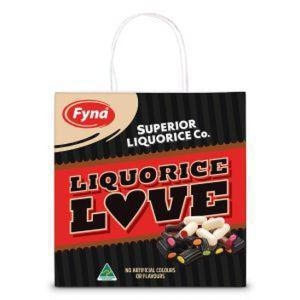

In [4]:
import requests
from IPython.display import Image, display


# Replace with the actual URL of the image
image_url = data.iloc[0]['image_url']

try:
    # Fetch the image content
    response = requests.get(image_url)
    response.raise_for_status() # Raise an exception for bad status codes (like 404)

    # Get the image content as bytes
    image_data = response.content

    # Create an Image object from the bytes data
    img = Image(data=image_data)

    # Display the image
    display(img)

except requests.exceptions.RequestException as e:
    print(f"Error fetching image: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
